In [2]:
# 📦 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

Matplotlib is building the font cache; this may take a moment.


In [4]:
# 📁 2. Load Dataset
df = pd.read_csv('../data/employee_salaries.csv')  # Adjust path if needed
df.head()

,sr,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [7]:
# 🧹 3. Data Cleaning & Preprocessing

# Drop missing values
df.dropna(inplace=True)

# Encode categorical features
categorical_cols = ['experience_level', 'employment_type', 'job_title',
                    'employee_residence', 'company_location', 'company_size']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Scale numerical features
scaler = StandardScaler()
df[['work_year', 'remote_ratio']] = scaler.fit_transform(df[['work_year', 'remote_ratio']])

In [8]:
# 🎯 4. Define Features and Target
X = df.drop('salary_in_usd', axis=1)
y = df['salary_in_usd']

In [9]:
# ✂️ 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# 🌲 6. Train Models
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
voting = VotingRegressor(estimators=[('rf', rf), ('gb', gb)])

rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
voting.fit(X_train, y_train)

,estimators,"[('rf', ...), ('gb', ...)]"
,weights,None
,n_jobs,None
,verbose,False
,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0


In [12]:
# 📊 7. Evaluate Models
def evaluate(model, name):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Manual RMSE
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - RMSE: {rmse:.2f}, R²: {r2:.2f}")


evaluate(rf, "Random Forest")
evaluate(gb, "Gradient Boosting")
evaluate(voting, "Voting Regressor")

Random Forest - RMSE: 41329.93, R²: 0.55
Gradient Boosting - RMSE: 41478.82, R²: 0.55
Voting Regressor - RMSE: 40200.73, R²: 0.58


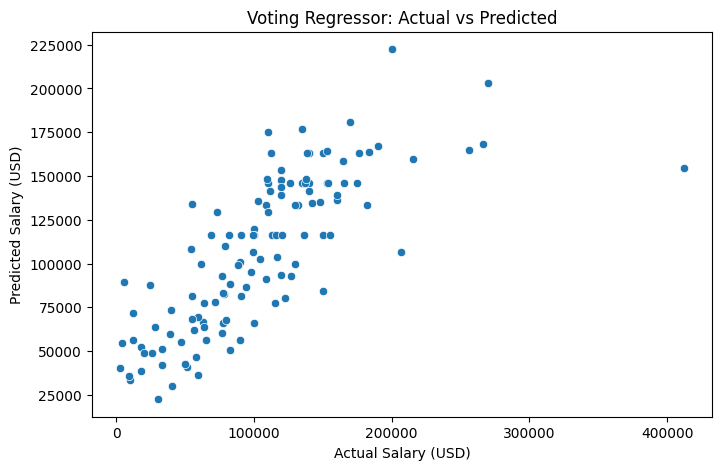

In [13]:
# 📈 8. Visualize Predictions
y_pred = voting.predict(X_test)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Salary (USD)")
plt.ylabel("Predicted Salary (USD)")
plt.title("Voting Regressor: Actual vs Predicted")
plt.show()

In [15]:
# 💾 9. Save Models
joblib.dump(rf, '../models/rf_model.pkl')
joblib.dump(gb, '../models/gb_model.pkl')
joblib.dump(voting, '../models/voting_model.pkl')

['../models/voting_model.pkl']